

## RFM Analysis

Customer Analytics is important to run a successful business. Sales and marketing resources are finite and expensive, therefore it is important to answer these questions when developing a marketing strategy.

* Who are our most/least valuable customers?
* How can we acquire new customers that resemble our most valuable?

In this project, we focus on RFM analysis. This type of analysis is used when historical data for existing customers is available. RFM Analysis identifies existing customers who are most likely to remain loyal to a company or respond to a new product. RFM analysis allows you to create customized and personalized messaging, and this can be used to streamline the various messages you send to a specific customer and continue sending messages of only a particular type, thereby reducing the chance of dissatisfaction or annoyance, and create higher customer satisfaction. RFM is a model based on historical data and helps forecast future behavior based on past interactions. The RFM Model of customer value uses proven marketing principles to help businesses differentiate between marketing to existing and new users and helps them create relevantly and personalized messaging by understanding user behavior. The model allows the business to segment its users based on three criteria based on an existing customer’s transaction history, namely:

1. The recency of Customer's Last purchase 
2. Frequency of purchases 
3. Total amount spent, which is referred to as monetary

The RFM model, when used in conjunction with traditional models of segmentation, can help businesses visualize new and existing customers differently, and create favorable conditions to maximize customer lifetime value.

## Business Problem 


How do we segment our customers to reach them effectively through target marketing?

By applying the paraeto principle to a customer database,  80% of a company's revenue comes from 20% of the customers. RFM helps determine who the top 20% of customers are and groups the remaining customers into other segments such as price-sensitive, potentially loyal, brand sensitive, etc. This ensures that each customer is better targeted and convert the other segments into the higher value segments and increase customer lifetime value. 

In this project, the customer sales data from January 2011 to May 2011 of an E-commerce store is analyzed to group customers from the United Kingdom into segments using the RFM model. The relevant libraries and the dataset is imported into the python environment. 


### Data Set

There are  eight variables in the data set:

1. InvoiceNo: Invoice number,  A 6-digit integral number uniquely assigned to each transaction.
2. StockCode: Product code, a 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product name
4. Quantity: The quantities of each product (item) per transaction.
5. InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
7. CustomerID: Customer number, a 5-digit integral number uniquely assigned to each customer.
8. Country 

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",None);
pd.set_option("display.max_rows",None);

#load data
url = 'https://raw.githubusercontent.com/Master-of-Business-Analytics/Project_06_RFM_Analysis/master/data.csv'
df = pd.read_csv(url, error_bad_lines=False,encoding= 'unicode_escape')




In [19]:

df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,540558,21258,?,-29,1/10/2011 10:04,0.00,NaN,United Kingdom
1,540560,21589,NaN,-14,1/10/2011 10:08,0.00,NaN,United Kingdom
2,540561,22343,PARTY PIZZA DISH RED RETROSPOT,24,1/10/2011 10:32,0.21,13004.0,United Kingdom
3,540561,22344,PARTY PIZZA DISH PINK POLKADOT,24,1/10/2011 10:32,0.21,13004.0,United Kingdom
4,540561,47504H,ENGLISH ROSE SPIRIT LEVEL,24,1/10/2011 10:32,0.85,13004.0,United Kingdom


## Data cleaning 

The dataset seemed relatively clean at first glance, but it was actually riddled with Null values. The code chunk below creates a new column that calculates the total purchase for each transaction. The NA values are also identified and the rows containing these NA values are removed. 

There are several methods of removing NA values from a dataset; replacing with another value or deleting the entire row. The choice of removal is dependent on the what data is been manipulated and how much data is available.

In [20]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,290603.000000,290603.000000,214539.000000
mean,8.363265,4.302626,15528.122756
std,292.791363,72.531652,1592.760180
min,-80995.000000,0.000000,12346.000000
25%,1.000000,1.250000,14159.000000
50%,3.000000,2.100000,15493.000000
75%,10.000000,4.130000,16923.000000
max,80995.000000,17836.460000,18287.000000


In any event, it is good practice to sift out incorrect transactions, particularly when they result in extreme outliers. So in this section, the large transactions are scanned to clean the data. More information on data cleaning can be found on the [data cleaning project](https://master-of-business-analytics.github.io/Website/Data_Cleaning.html).

In [21]:
# information about the data set
print('{:,} rows; {:,} columns'
      .format(df.shape[0], df.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(df[df.CustomerID.isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(df['InvoiceDate'].min(),
                                    df['InvoiceDate'].max()))

#Eliminating NA rows in Cstomer ID

df=df[df.notnull().all(axis=1)] #eliminating NA

290,603 rows; 8 columns
76,064 transactions don't have a customer id
Transactions timeframe from 1/10/2011 10:04 to 5/20/2011 14:06


In [22]:
print('{:,} rows; {:,} columns'
      .format(df.shape[0], df.shape[1]))

214,539 rows; 8 columns


In [23]:
#remove mi
df.drop(index=[df['Quantity'].idxmax(), df['Quantity'].idxmin()], inplace=True)
df.describe()

,Quantity,UnitPrice,CustomerID
count,214537.000000,214537.000000,214537.000000
mean,10.561642,3.048388,15528.114199
std,232.168351,14.165101,1592.765139
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,14159.000000
50%,4.000000,1.950000,15493.000000
75%,12.000000,3.750000,16923.000000
max,74215.000000,3155.950000,18287.000000


In [24]:

df.drop(index=[df['Quantity'].idxmax(), df['Quantity'].idxmin()], inplace=True)
df.describe()

,Quantity,UnitPrice,CustomerID
count,214535.000000,214535.000000,214535.000000
mean,10.561741,3.048407,15528.143865
std,50.550843,14.165166,1592.742929
min,-3114.000000,0.000000,12747.000000
25%,2.000000,1.250000,14159.000000
50%,4.000000,1.950000,15493.000000
75%,12.000000,3.750000,16923.000000
max,12540.000000,3155.950000,18287.000000


Note that the Minimum quantity and Maximum quantity have different absolute values.

In [25]:
df = df[df['UnitPrice']>0]

In [26]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,214516.000000,214516.000000,214516.000000
mean,10.503361,3.048677,15528.224948
std,42.705725,14.165764,1592.710040
min,-3114.000000,0.001000,12747.000000
25%,2.000000,1.250000,14159.000000
50%,4.000000,1.950000,15493.000000
75%,12.000000,3.750000,16923.000000
max,4800.000000,3155.950000,18287.000000


In [27]:
# Convert InvoiceDate from object to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#creating a total sales column
df["Totalsum"] = df['Quantity'] * df['UnitPrice']

In [28]:
#Check the remaining large negative transactions
df[df.Totalsum<0].sort_values('Totalsum').head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsum
257377,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,-6539.40
257375,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749.0,United Kingdom,-4921.50
257373,C550456,48185,DOORMAT FAIRY CAKE,-670,2011-04-18 13:08:00,6.75,15749.0,United Kingdom,-4522.50
257376,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,-3700.00
257374,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2011-04-18 13:08:00,2.55,15749.0,United Kingdom,-3315.00
275098,C549452,D,Discount,-1,2011-04-08 14:17:00,1867.86,17940.0,United Kingdom,-1867.86
35080,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.55,16029.0,United Kingdom,-1836.00
35074,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.30,16029.0,United Kingdom,-1656.00
69265,C569387,23284,DOORMAT KEEP CALM AND COME IN,-200,2011-10-03 16:49:00,7.08,14031.0,United Kingdom,-1416.00
35081,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029.0,United Kingdom,-1373.76


In [29]:
# Customer 15749 is in the top 10 
df[df.CustomerID==15749].sort_values('Totalsum').head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsum
257377,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,-6539.4
257375,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749.0,United Kingdom,-4921.5
257373,C550456,48185,DOORMAT FAIRY CAKE,-670,2011-04-18 13:08:00,6.75,15749.0,United Kingdom,-4522.5
257376,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,-3700.0
257374,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2011-04-18 13:08:00,2.55,15749.0,United Kingdom,-3315.0
257775,550461,47556B,TEA TIME TEA TOWELS,1300,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,2730.0
2204,540818,47556B,TEA TIME TEA TOWELS,1300,2011-01-11 12:57:00,2.55,15749.0,United Kingdom,3315.0
257777,550461,21175,GIN + TONIC DIET METAL SIGN,2000,2011-04-18 13:20:00,1.69,15749.0,United Kingdom,3380.0
2143,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom,3700.0
257776,550461,48185,DOORMAT FAIRY CAKE,670,2011-04-18 13:20:00,6.35,15749.0,United Kingdom,4254.5


In [30]:
# removing cancelled orders
#index 257377,257778, 257375, 257373,2142,2205,2143,257374,257376,2204 - all calcellations

df.drop(index=[257377,257778, 257375, 257373,2142,2205,2143,257374,257376,2204], inplace=True)

In [31]:
# customer 16029
df[df.CustomerID==16029].sort_values('InvoiceDate').head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsum
25750,C540030,22070,SMALL RED RETROSPOT MUG IN BOX,-24,2011-01-04 13:47:00,3.75,16029.0,United Kingdom,-90.00
25749,540029,22207,FRYING PAN UNION FLAG,24,2011-01-04 13:47:00,3.75,16029.0,United Kingdom,90.00
5679,541105,85099F,JUMBO BAG STRAWBERRY,200,2011-01-13 14:34:00,1.65,16029.0,United Kingdom,330.00
5680,541105,22386,JUMBO BAG PINK POLKADOT,200,2011-01-13 14:34:00,1.65,16029.0,United Kingdom,330.00
13090,541610,84880,WHITE WIRE EGG HOLDER,17,2011-01-20 10:18:00,4.95,16029.0,United Kingdom,84.15
13091,541610,22207,FRYING PAN UNION FLAG,48,2011-01-20 10:18:00,3.75,16029.0,United Kingdom,180.00
13092,541610,21928,JUMBO BAG SCANDINAVIAN PAISLEY,100,2011-01-20 10:18:00,1.65,16029.0,United Kingdom,165.00
13093,541611,79321,CHILLI LIGHTS,96,2011-01-20 10:18:00,3.82,16029.0,United Kingdom,366.72
13094,541611,22779,WOODEN OWLS LIGHT GARLAND,48,2011-01-20 10:18:00,3.37,16029.0,United Kingdom,161.76
19493,541992,85099B,JUMBO BAG RED RETROSPOT,100,2011-01-25 09:31:00,1.65,16029.0,United Kingdom,165.00


In [32]:
# removing rows with the large equal absolute values
df.drop(index=[35090,35080,35074,83508,35077,83505,35075,35084,35076,83502,35089,35071,35072,35032,35088,35026,83471,35082,35079,35073,83469,35087], inplace=True)



In [33]:
df.describe()

,Quantity,UnitPrice,CustomerID,Totalsum
count,214484.000000,214484.000000,214484.000000,214484.000000
mean,10.504928,3.048726,15528.163290,17.793502
std,40.050825,14.166812,1592.820059,62.596212
min,-1350.000000,0.001000,12747.000000,-1867.860000
25%,2.000000,1.250000,14159.000000,3.750000
50%,4.000000,1.950000,15493.000000,9.950000
75%,12.000000,3.750000,16923.000000,17.700000
max,4800.000000,3155.950000,18287.000000,6539.400000


The customer records are grouped by recency of their purchase, the frequency by their quantity, and the monetary value of the purchases. 

### Recency Scores

To calculate recency, a snapshot date is created. This date is one day after the most recent invoice date of the data set. The date difference is used to show the recency of the purchase.

In [34]:
# Create snapshot date
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)  # set current date as most recent date plus one day
rec_df = snapshot_date-df.groupby("CustomerID").agg({"InvoiceDate":max}) 
#group customers by their most recent purchase

rec_df.rename(columns={"InvoiceDate": "Recency"}, inplace=True)#rename column
rec_df=rec_df["Recency"].apply(lambda x: x.days) #extracting number of days only
rec_df.head(5)

CustomerID
12747.0      2
12748.0      1
12749.0      4
12820.0      3
12823.0    255
Name: Recency, dtype: int64

### Frequency

To calculate the frequency, the number of invoices per customer is calculated.

In [35]:
freq_df = df.groupby("CustomerID").agg({'InvoiceNo': 'count'})
freq_df.rename(columns={"InvoiceNo": "Frequency"}, inplace=True)#rename column
freq_df.head()

,Frequency
CustomerID,
12747.0,50
12748.0,2729
12749.0,114
12820.0,45
12823.0,3


### Monetary 

To calculated the monetary score, the total value of the purchases made by each customer is calculated.

In [36]:
mon_df = df.groupby("CustomerID").agg({'Totalsum': 'sum'})
mon_df.rename(columns={"Totalsum": "Monetary"}, inplace=True)#rename column
mon_df.head(5)

,Monetary
CustomerID,
12747.0,2040.43
12748.0,15727.57
12749.0,2194.75
12820.0,724.57
12823.0,994.50


### RFM model

In [37]:
rfm=pd.concat([rec_df,freq_df, mon_df], axis=1) #combining all scores
rfm.head(7)

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,2,50,2040.43
12748.0,1,2729,15727.57
12749.0,4,114,2194.75
12820.0,3,45,724.57
12823.0,255,3,994.50
12824.0,60,25,397.12
12826.0,3,62,964.20


### Creating Rank scores
    
The customers are ranked in each criteria. Each criteria is broken into 5 buckets. Scores are assigned based on the relative percentile to the RFM features. This approach of scaling customers from 1-5 will result in, at the most, 125 different RFM scores (5x5x5), ranging from 111(lowest) to 555(highest) 

In [38]:
# --Calculate R and F groups--

# Create labels for Recency and Frequency and MonetaryValue
r_labels = range(5, 0, -1) #[4,3,2,1] 
f_labels = range(1, 6)   #[1,2,3,4]
m_labels = range(1, 6)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(rfm['Recency'], q=5, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(rfm['Frequency'], q=5, labels=f_labels)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(rfm['Monetary'], q=5, labels=m_labels)



# Create new columns R_score, M_score and F_score  
rfm = rfm.assign(R_score = r_groups.values, F_score = f_groups.values, M_score = m_groups.values)
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score
CustomerID,,,,,,
12747.0,2,50,2040.43,5,4,5
12748.0,1,2729,15727.57,5,5,5
12749.0,4,114,2194.75,5,5,5
12820.0,3,45,724.57,5,3,4
12823.0,255,3,994.50,1,1,4


### RFM Score 

There are many ways to calculate the aggregate RFM score. Most companies allocate different weights to each criteria. For example, a customer of R_score =1, F_score =2 , M_score =3 could either have a RFM score of:

1. 123 if weights 100,10,1 were allocated to each criteria. 
2. 1+2+3 = 6 could be obtained
3. (1+2+3)/3=2 could also be calculated. 

Depending on the nature of the businesses, one might increase or decrease the relative importance of each RFM variable to arrive at the final score. In this project,the RFM score is simply the average of the individual R, F, and M scores.


In [39]:
#create avegare rfm score column
rfm['Ave_Score'] = rfm[['R_score','F_score','M_score']].mean(axis=1)
#create rfm score by combining all scores
rfm['RFM score'] = rfm.R_score.astype(str) \
                            + rfm.F_score.astype(str) \
                            + rfm.M_score.astype(str)
rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,Ave_Score,RFM score
CustomerID,,,,,,,,
12747.0,2,50,2040.43,5,4,5,4.666667,545
12748.0,1,2729,15727.57,5,5,5,5.000000,555
12749.0,4,114,2194.75,5,5,5,5.000000,555
12820.0,3,45,724.57,5,3,4,4.000000,534
12823.0,255,3,994.50,1,1,4,2.000000,114


# Customer Classification based on RFM Analysis

There are many ways we can use the RFM scores to create customer segments. The method used depends on the objective of the analysis. One way of using classifying customers is creating segments based on the average RFM score. Here, we take inspiration from some common segment names. 

Customer Segment | Average Score
-----------|----
Can't lose them | 5
Champions | 4-5
Loyal | 3-4
Needs Attention | 2-3
Require Activation | 0-2
  



In [40]:
# Define rfm_level function
def rfm_level(df):
    if df['Ave_Score'] >= 5:
        return 'Can\'t Loose Them'
    elif ((df['Ave_Score'] >= 4) and (df['Ave_Score'] < 5)):
        return 'Champions'
    elif ((df['Ave_Score'] >= 3) and (df['Ave_Score'] < 4)):
        return 'Loyal'
    elif ((df['Ave_Score'] >= 2) and (df['Ave_Score'] < 3)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
    
# Create a new variable RFM_Level by applying function to table

rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,Ave_Score,RFM score,RFM_Level
CustomerID,,,,,,,,,
12747.0,2,50,2040.43,5,4,5,4.666667,545,Champions
12748.0,1,2729,15727.57,5,5,5,5.000000,555,Can't Loose Them
12749.0,4,114,2194.75,5,5,5,5.000000,555,Can't Loose Them
12820.0,3,45,724.57,5,3,4,4.000000,534,Champions
12823.0,255,3,994.50,1,1,4,2.000000,114,Needs Attention


<b> Calculating the size of each segment</b>

In [41]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)


rfm_level_agg

Recency Frequency Monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them       4.0     290.7   6228.5   220
Champions             19.1     119.3   1954.5   691
Loyal                 58.6      50.8    784.6   810
Needs Attention      113.1      22.5    388.5   918
Require Activation   215.4       9.9    163.1   634

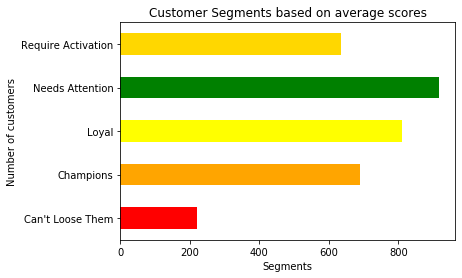

In [58]:
#visualizing customer segments based on average scores
rfm_level_agg['Monetary']['count'].plot(kind="barh", use_index=True, color=['red', 'orange', 'yellow', 'green', 'gold'])
#rfm['Count'].plot(kind="barh", use_index=True, color=['red', 'orange', 'yellow', 'green', 'gold'])
plt.title("Customer Segments based on average scores")
plt.xlabel("Segments")
plt.ylabel("Number of customers")
plt.show()

In [56]:
rfm_level_agg['Monetary']['count']

RFM_Level
Can't Loose Them      220
Champions             691
Loyal                 810
Needs Attention       918
Require Activation    634
Name: count, dtype: int64

The customer segmentation above assigns equal weighs to recency, frequency and monetary scores. This method of segmentation is usually 

An alternative way is to select groups of customers to whom specific types of communications or promotions will be sent, based on the RFM segments in which they appear.

1. Best Customers: This group consists of those customers who are found in R-score-1, F-score-1 and M-Score-1, meaning that they transacted recently, do so often and spend more than other customers. A shortened notation for this segment is 1-1-1.

2. High-spending New Customers: This group consists of those customers in 1-4-1 and 1-4-2. These are customers who transacted only once, but very recently and they spent a lot.

3. Lowest-Spending Active Loyal Customers: This group consists of those customers in segments 1-1-3 and 1-1-4 (they transacted recently and do so often, but spend the least).

4.Churned Best Customers: This segment consists of those customers in groups 4-1-1, 4-1-2, 4-2-1 and 4-2-2 (they transacted frequently and spent a lot, but it been a long time since they have transacted).

# Final Conclusion

RFM is relatively simple technique that could drastically improve your marketing performance. RFM analysis helps organizations find answers to the following questions:

* Who are your best customers?
* Which of your customers could contribute to your churn rate?
* Who has the potential to become valuable customers?
* Which of your customers can be retained?
* Which of your customers are most likely to respond to engagement campaigns?

However there is some problems with traditional RFM analysis, it is: 
* Computationally awkward and labor intensive. 
* Ignores within quintile variance.
* Ordering of variables is arbitrary. Which do you sort by first? 
* Some variables may have too few levels.
* Correlations between variables create problems. E.g., first recency quintile may have more high frequency customers.
* Does not generalize well to new customers. (e.g. How do new customers get assigned to a quintile?) 

As a result, Logistic Regression usually is preferred to RFM analysis when predicting the behavior of the customer.


# Reference 

1. Aditya,A. (2020, March 20). Predictive Segments using RFM Analysis: An In-Depth Guide. Retrieved July 03, 2020, from https://www.moengage.com/blog/rfm-analysis-using-predictive-segments/

2. Yuan, Y. (2019, August 19). Recency, Frequency, Monetary Model with Python - and how Sephora uses it to optimize their Google... Retrieved July 03, 2020, from https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17

3. https://www.putler.com/rfm-analysis/
4. https://www.optimove.com/resources/learning-center/rfm-segmentation